Подготовка данных

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv("insurance.csv")

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [20]:
print("\nКоличество пропусков в каждом столбце:")
print(df.isnull().sum())


Количество пропусков в каждом столбце:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\n{col}: выбросов найдено {len(outliers)}")


age: выбросов найдено 0

bmi: выбросов найдено 9

children: выбросов найдено 0

charges: выбросов найдено 139


In [22]:
categorical_cols = df.select_dtypes(exclude=["number"]).columns
numeric_cols = df.select_dtypes(include=["number"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

print()

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)

print(df_encoded.head())

Categorical columns: ['sex', 'smoker', 'region']
Numeric columns: ['age', 'bmi', 'children', 'charges']

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  



Матрица корреляций:
                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806         -0.023066   
charge

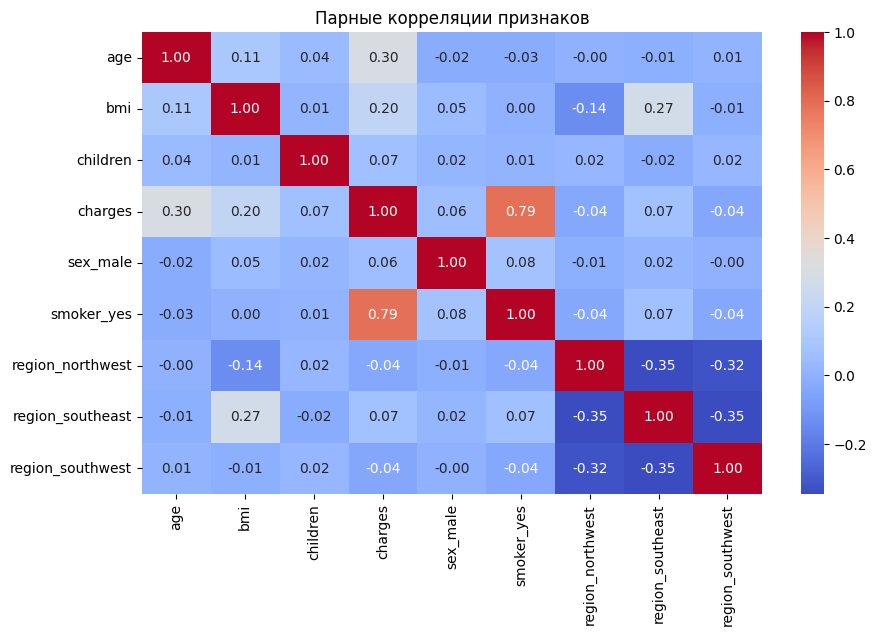

In [23]:
corr_matrix = df_encoded.corr()

print("\nМатрица корреляций:")
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Парные корреляции признаков")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [25]:
print(len(df_encoded.drop_duplicates()), len(df_encoded))
df_encoded.drop_duplicates(inplace=True)
X = df_encoded.drop(columns=['charges'], axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_with_intercept = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_test_with_intercept = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])


1337 1338


In [26]:
def calculate_manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Аналитическое решение

In [28]:
weights_analytical = np.linalg.pinv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

print(f"Intercept (w0): {weights_analytical[0]}")
print(f"Коэффициенты (w1...wn): {weights_analytical[1:]}")

y_train_pred = X_train_with_intercept @ weights_analytical
y_test_pred = X_test_with_intercept @ weights_analytical

train_mse = calculate_manual_mse(y_train, y_train_pred)
test_mse = calculate_manual_mse(y_test, y_test_pred)

print(f"MSE на тренировочной выборке: {train_mse}")
print(f"MSE на тестовой выборке: {test_mse}")

Intercept (w0): 13030.203369289055
Коэффициенты (w1...wn): [3472.97555343 1927.82825101  636.5011853   -50.74967467 9234.34248701
 -168.94443943 -371.7808097  -284.61039635]
MSE на тренировочной выборке: 36979860.904728666
MSE на тестовой выборке: 35478020.675235555


### Численное решение

Итерация 0, Loss: 153343941.2134
Итерация 100, Loss: 36801955.5009
Итерация 200, Loss: 21059199.3682
Итерация 300, Loss: 18863894.8649
Итерация 400, Loss: 18548411.7653
Итерация 500, Loss: 18500774.2280
Итерация 600, Loss: 18492722.0730
Итерация 700, Loss: 18490975.0832
Итерация 800, Loss: 18490423.6127
Итерация 900, Loss: 18490186.1107

Final weights:
Intercept: 13029.6409
Coefficients: [3473.88683184 1922.89182706  636.79680449  -49.71055939 9233.45351798
 -153.09908438 -353.33089211 -268.09159654]

MSE на тренировочной выборке: 36980134.3423
MSE на тестовой выборке: 35495027.5317


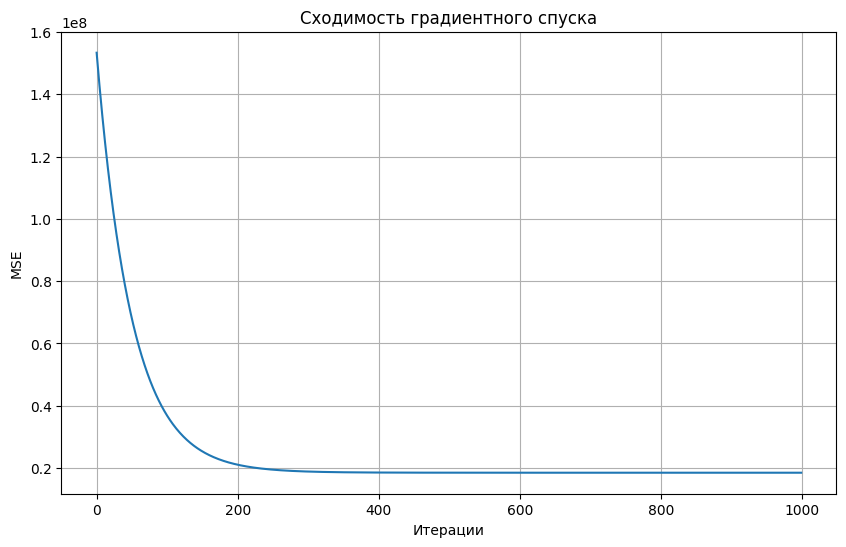

In [29]:
learning_rate = 0.01
n_iterations = 1000
m = X_train_with_intercept.shape[0] 

np.random.seed(42)
weights_gradient = np.random.randn(X_train_with_intercept.shape[1])

loss_history = []

for iteration in range(n_iterations):
    predictions = X_train_with_intercept.dot(weights_gradient)
    errors = predictions - y_train
    gradient = (1/m) * X_train_with_intercept.T.dot(errors)
    weights_gradient -= learning_rate * gradient
    loss = (1/(2*m)) * errors.T.dot(errors)
    loss_history.append(loss)
    if iteration % 100 == 0:
        print(f"Итерация {iteration}, Loss: {loss:.4f}")

print(f"\nFinal weights:")
print(f"Intercept: {weights_gradient[0]:.4f}")
print(f"Coefficients: {weights_gradient[1:]}")

y_train_pred = X_train_with_intercept.dot(weights_gradient)
y_test_pred = X_test_with_intercept.dot(weights_gradient)

train_mse = calculate_manual_mse(y_train, y_train_pred)
test_mse = calculate_manual_mse(y_test, y_test_pred)

print(f"\nMSE на тренировочной выборке: {train_mse:.4f}")
print(f"MSE на тестовой выборке: {test_mse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Сходимость градиентного спуска')
plt.xlabel('Итерации')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


### Сравниваем решения

In [30]:
print("\nСравнение с аналитическим решением:")
weights_analytical = np.linalg.pinv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

print(f"Аналитическое решение - Intercept: {weights_analytical[0]:.4f}")
print(f"Градиентный спуск - Intercept: {weights_gradient[0]:.4f}")

y_test_analytical = X_test_with_intercept.dot(weights_analytical)
test_mse_analytical = calculate_manual_mse(y_test, y_test_analytical)

print(f"\nMSE аналитического решения на тесте: {test_mse_analytical:.4f}")
print(f"MSE градиентного спуска на тесте: {test_mse:.4f}")


Сравнение с аналитическим решением:
Аналитическое решение - Intercept: 13030.2034
Градиентный спуск - Intercept: 13029.6409

MSE аналитического решения на тесте: 35478020.6752
MSE градиентного спуска на тесте: 35495027.5317


## Решаем с регуляризацией
### Аналитическое решение

In [32]:
alpha = 2.0
n_features = X_train_with_intercept.shape[1]
identity_matrix = np.eye(n_features)
identity_matrix[0, 0] = 0
weights_analytical_ridge = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept + alpha * identity_matrix) @ X_train_with_intercept.T @ y_train

print("=== АНАЛИТИЧЕСКОЕ РЕШЕНИЕ ===")
print(f"Intercept: {weights_analytical_ridge[0]:.4f}")
print(f"Coefficients: {weights_analytical_ridge[1:]}")
print(f"L2 норма весов: {np.sum(weights_analytical_ridge[1:]**2):.4f}")

y_train_ridge = X_train_with_intercept @ weights_analytical_ridge
y_test_ridge = X_test_with_intercept @ weights_analytical_ridge

train_mse_ridge = calculate_manual_mse(y_train, y_train_ridge)
test_mse_ridge = calculate_manual_mse(y_test, y_test_ridge)

print(f"\nMSE на train: {train_mse_ridge:.4f}")
print(f"MSE на test: {test_mse_ridge:.4f}")

=== АНАЛИТИЧЕСКОЕ РЕШЕНИЕ ===
Intercept: 13030.2034
Coefficients: [3466.42219542 1923.68827221  636.09283085  -49.15963121 9216.43659145
 -168.28459347 -368.01869748 -283.14291213]
L2 норма весов: 101310320.9833

MSE на train: 36980231.2663
MSE на test: 35547073.9351


### Численное решение с применением регуляризации

=== ГРАДИЕНТНЫЙ СПУСК С L2-РЕГУЛЯРИЗАЦИЕЙ ===
Iteration 0, Loss: 153363351.7595
Iteration 200, Loss: 21101952.7564
Iteration 400, Loss: 18595655.1237
Iteration 600, Loss: 18540210.2680
Iteration 800, Loss: 18537937.6275
Intercept: 13029.6409
Coefficients: [3470.59348309 1920.88978182  636.58942204  -48.92706433 9224.50079966
 -153.00670354 -351.72031664 -267.60379208]
L2 норма весов: 101452621.6536

MSE на train: 36980271.7805
MSE на test: 35529306.3486

=== ГРАДИЕНТНЫЙ СПУСК С L1-РЕГУЛЯРИЗАЦИЕЙ ===
Iteration 0, Loss: 153376146.2999
Iteration 200, Loss: 21059745.5492
Iteration 400, Loss: 18548404.1819
Iteration 600, Loss: 18492727.0600
Iteration 800, Loss: 18490435.6721
Intercept: 13029.6408
Coefficients: [3473.88299602 1922.9044627   636.79571326  -49.71103282 9233.45226559
 -153.14994664 -353.38748392 -268.14383131]
L1 норма весов: 16091.4277
Количество нулевых весов: 0

MSE на train: 36980132.6511
MSE на test: 35494991.4595


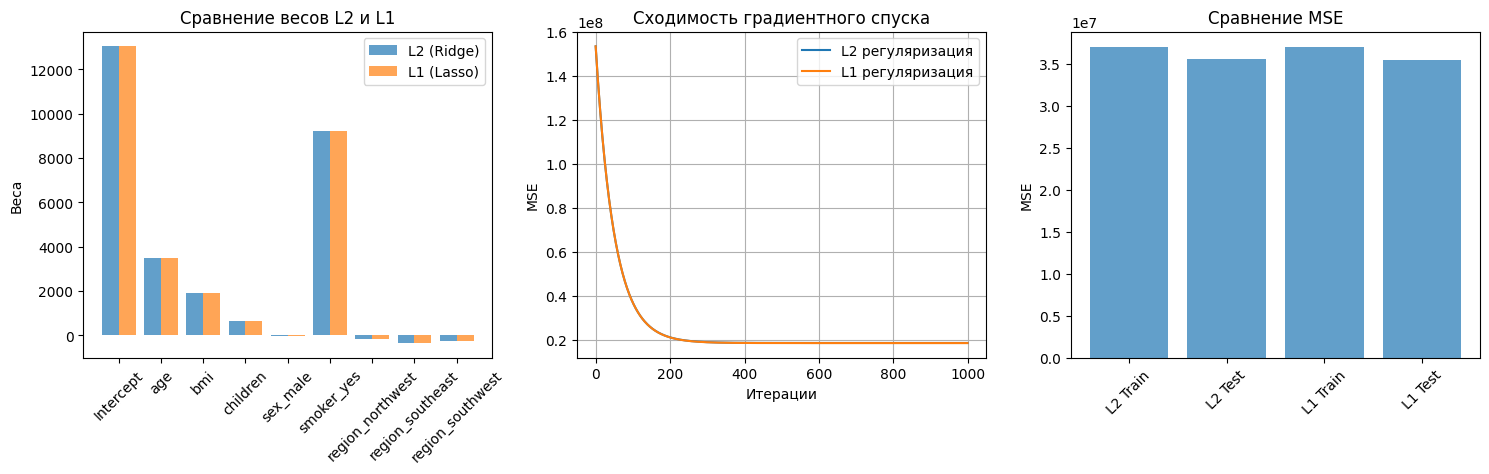

In [33]:
learning_rate = 0.01
n_iterations = 1000
alpha = 1.0
m = X_train_with_intercept.shape[0]

print("=== ГРАДИЕНТНЫЙ СПУСК С L2-РЕГУЛЯРИЗАЦИЕЙ ===")

weights_gradient_ridge = np.random.randn(X_train_with_intercept.shape[1])
loss_history_l2 = []

for iteration in range(n_iterations):
    predictions = X_train_with_intercept.dot(weights_gradient_ridge)
    errors = predictions - y_train
    
    gradient = (1/m) * X_train_with_intercept.T.dot(errors)
    
    reg_gradient = (alpha/m) * weights_gradient_ridge
    reg_gradient[0] = 0 
    gradient += reg_gradient
    
    weights_gradient_ridge -= learning_rate * gradient
    
    mse = (1/(2*m)) * errors.T.dot(errors)
    reg_loss = (alpha/(2*m)) * np.sum(weights_gradient_ridge[1:]**2) 
    total_loss = mse + reg_loss
    loss_history_l2.append(total_loss)
    
    if iteration % 200 == 0:
        print(f"Iteration {iteration}, Loss: {total_loss:.4f}")

print(f"Intercept: {weights_gradient_ridge[0]:.4f}")
print(f"Coefficients: {weights_gradient_ridge[1:]}")
print(f"L2 норма весов: {np.sum(weights_gradient_ridge[1:]**2):.4f}")

y_train_l2 = X_train_with_intercept @ weights_gradient_ridge
y_test_l2 = X_test_with_intercept @ weights_gradient_ridge

print(f"\nMSE на train: {np.mean((y_train - y_train_l2) ** 2):.4f}")
print(f"MSE на test: {np.mean((y_test - y_test_l2) ** 2):.4f}")

print("\n=== ГРАДИЕНТНЫЙ СПУСК С L1-РЕГУЛЯРИЗАЦИЕЙ ===")

weights_gradient_lasso = np.random.randn(X_train_with_intercept.shape[1])
loss_history_l1 = []

for iteration in range(n_iterations):
    predictions = X_train_with_intercept.dot(weights_gradient_lasso)
    errors = predictions - y_train
    
    gradient = (1/m) * X_train_with_intercept.T.dot(errors)
    
    reg_gradient = (alpha/m) * np.sign(weights_gradient_lasso)
    reg_gradient[0] = 0  
    gradient += reg_gradient
    
    weights_gradient_lasso -= learning_rate * gradient
    
    mse = (1/(2*m)) * errors.T.dot(errors)
    reg_loss = (alpha/m) * np.sum(np.abs(weights_gradient_lasso[1:])) 
    total_loss = mse + reg_loss
    loss_history_l1.append(total_loss)
    
    if iteration % 200 == 0:
        print(f"Iteration {iteration}, Loss: {total_loss:.4f}")

print(f"Intercept: {weights_gradient_lasso[0]:.4f}")
print(f"Coefficients: {weights_gradient_lasso[1:]}")
print(f"L1 норма весов: {np.sum(np.abs(weights_gradient_lasso[1:])):.4f}")
print(f"Количество нулевых весов: {np.sum(np.abs(weights_gradient_lasso[1:]) < 0.001)}")

y_train_l1 = X_train_with_intercept @ weights_gradient_lasso
y_test_l1 = X_test_with_intercept @ weights_gradient_lasso

print(f"\nMSE на train: {np.mean((y_train - y_train_l1) ** 2):.4f}")
print(f"MSE на test: {np.mean((y_test - y_test_l1) ** 2):.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
features = ['Intercept'] + list(X.columns)
x_pos = np.arange(len(weights_gradient_lasso))
plt.bar(x_pos - 0.2, weights_gradient_lasso, width=0.4, label='L2 (Ridge)', alpha=0.7)
plt.bar(x_pos + 0.2, weights_gradient_lasso, width=0.4, label='L1 (Lasso)', alpha=0.7)
plt.xticks(x_pos, features, rotation=45)
plt.ylabel('Веса')
plt.title('Сравнение весов L2 и L1')
plt.legend()

# Сходимость
plt.subplot(1, 3, 2)
plt.plot(loss_history_l2, label='L2 регуляризация')
plt.plot(loss_history_l1, label='L1 регуляризация')
plt.xlabel('Итерации')
plt.ylabel('MSE')
plt.title('Сходимость градиентного спуска')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
models = ['L2 Train', 'L2 Test', 'L1 Train', 'L1 Test']
mse_values = [
    calculate_manual_mse(y_train, y_train_l2),
    calculate_manual_mse(y_test, y_test_l2),
    calculate_manual_mse(y_train , y_train_l1),
    calculate_manual_mse(y_test , y_test_l1)
]
plt.bar(models, mse_values, alpha=0.7)
plt.ylabel('MSE')
plt.title('Сравнение MSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Сравниваем решения

In [35]:
y_pred_analytical = X_test_with_intercept @ weights_analytical
y_pred_analytical_ridge = X_test_with_intercept @ weights_analytical_ridge
y_pred_gradient = X_test_with_intercept @ weights_gradient
y_pred_gradient_ridge = X_test_with_intercept @ weights_gradient_ridge
y_pred_gradient_lasso = X_test_with_intercept @ weights_gradient_lasso
y_pred_mean = np.full(len(y_test), y_train.mean())

mse_analytical = calculate_manual_mse(y_test, y_pred_analytical)
mse_analytical_ridge = calculate_manual_mse(y_test, y_pred_analytical_ridge)
mse_gradient = calculate_manual_mse(y_test, y_pred_gradient)
mse_gradient_ridge = calculate_manual_mse(y_test, y_pred_gradient_ridge)
mse_gradient_lasso = calculate_manual_mse(y_test, y_pred_gradient_lasso)
mse_mean = calculate_manual_mse(y_test, y_pred_mean)

print(f"Аналитическое решение (без регуляризации): {mse_analytical:.4f}")
print(f"Аналитическое решение (с L2 регуляризацией): {mse_analytical_ridge:.4f}")
print(f"Численное решение (без регуляризации): {mse_gradient:.4f}")
print(f"Численное решение (с L2 регуляризацией): {mse_gradient_ridge:.4f}")
print(f"Численное решение (с L1 регуляризацией): {mse_gradient_lasso:.4f}")
print(f"Решение с использованием среднего в тренировочной выборке: {mse_mean:.4f}")

Аналитическое решение (без регуляризации): 35478020.6752
Аналитическое решение (с L2 регуляризацией): 35547073.9351
Численное решение (без регуляризации): 35495027.5317
Численное решение (с L2 регуляризацией): 35529306.3486
Численное решение (с L1 регуляризацией): 35494991.4595
Решение с использованием среднего в тренировочной выборке: 185298141.6874


In [36]:
mse_dict = {
    "Аналитическое решение (без регуляризации)": mse_analytical,
    "Аналитическое решение (с L2 регуляризацией)": mse_analytical_ridge,
    "Численное решение (без регуляризации)": mse_gradient,
    "Численное решение (с L2 регуляризацией)": mse_gradient_ridge,
    "Численное решение (с L1 регуляризацией)": mse_gradient_lasso,
    "Решение с использованием среднего в тренировочной выборке": mse_mean,
}

sorted_mse = dict(sorted(mse_dict.items(), key=lambda x: x[1]))

print("=== СРАВНЕНИЕ МОДЕЛЕЙ (от лучшей к худшей) ===")
for model_name, mse_value in sorted_mse.items():
    print(f"{model_name}: {mse_value:.4f}")

best_model = min(mse_dict.items(), key=lambda x: x[1])
print(f"\nЛучшая модель: '{best_model[0]}' с MSE = {best_model[1]:.4f}")

=== СРАВНЕНИЕ МОДЕЛЕЙ (от лучшей к худшей) ===
Аналитическое решение (без регуляризации): 35478020.6752
Численное решение (с L1 регуляризацией): 35494991.4595
Численное решение (без регуляризации): 35495027.5317
Численное решение (с L2 регуляризацией): 35529306.3486
Аналитическое решение (с L2 регуляризацией): 35547073.9351
Решение с использованием среднего в тренировочной выборке: 185298141.6874

Лучшая модель: 'Аналитическое решение (без регуляризации)' с MSE = 35478020.6752
